# Experiment 1 — Academic + Behavioral Features

**Goal:** Predict `final_grade` using only academic and behavioral features.  
**Features used:** `study_hours`, `attendance_percentage`, `study_method`, `math_score`, `science_score`, `english_score`  
**Models:** Logistic Regression, Decision Tree  
**Why these models?**
- Logistic Regression → Simple baseline linear classifier
- Decision Tree → Captures non-linear patterns and is easy to interpret

In [1]:
# --- Imports ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score

import warnings
warnings.filterwarnings('ignore')

print('All imports loaded successfully!')

All imports loaded successfully!


## Step 1 — Load Cleaned Data
We load the already preprocessed train and test CSVs from `data_analysis.ipynb`.

In [2]:
# Load the cleaned datasets
train_df = pd.read_csv('../datasets/train_cleaned.csv')
test_df  = pd.read_csv('../datasets/test_cleaned.csv')

print('Training data shape :', train_df.shape)
print('Test data shape     :', test_df.shape)
print('\nColumns available   :', list(train_df.columns))

Training data shape : (12000, 23)
Test data shape     : (3000, 23)

Columns available   : ['age', 'parent_education', 'study_hours', 'attendance_percentage', 'internet_access', 'travel_time', 'extra_activities', 'math_score', 'science_score', 'english_score', 'overall_score', 'gender_female', 'gender_male', 'gender_other', 'school_type_private', 'school_type_public', 'study_method_coaching', 'study_method_group study', 'study_method_mixed', 'study_method_notes', 'study_method_online videos', 'study_method_textbook', 'final_grade']


## Step 2 — Select Academic + Behavioral Features

For Experiment 1 we use **only** these features:
- `study_hours`, `attendance_percentage` (behavioral)
- `math_score`, `science_score`, `english_score` (academic scores)
- `study_method_*` columns (behavioral — one-hot encoded)

In [3]:
# Define the features for Experiment 1
exp1_features = [
    'study_hours',
    'attendance_percentage',
    'math_score',
    'science_score',
    'english_score',
    'study_method_coaching',
    'study_method_group study',
    'study_method_mixed',
    'study_method_notes',
    'study_method_online videos',
    'study_method_textbook'
]

X_train = train_df[exp1_features]
X_test  = test_df[exp1_features]

y_train = train_df['final_grade']
y_test  = test_df['final_grade']

print('Experiment 1 feature count :', len(exp1_features))
print('X_train shape              :', X_train.shape)
print('X_test  shape              :', X_test.shape)
print('\nTarget distribution (train):')
print(y_train.value_counts().sort_index())

Experiment 1 feature count : 11
X_train shape              : (12000, 11)
X_test  shape              : (3000, 11)

Target distribution (train):
final_grade
0    1437
1    2702
2    3016
3    2958
4    1310
5     577
Name: count, dtype: int64


## Step 3 — Train Models

We train two classifiers:
1. **Logistic Regression** — a linear baseline model
2. **Decision Tree** — a non-linear model that can capture complex patterns

In [4]:
#Model 1: Logistic Regression
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)

print('Logistic Regression trained successfully!')

Logistic Regression trained successfully!


In [5]:
#Model 2: Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

print('Decision Tree trained successfully!')

Decision Tree trained successfully!


## Step 4 — Evaluate Models

We evaluate both models using:
- **Accuracy** — overall correct predictions
- **Precision** — how many predicted positives are actually positive
- **Recall** — how many actual positives are correctly identified
- **F1 Score** — harmonic mean of precision and recall (important for imbalanced classes)
- **Confusion Matrix** — visual breakdown of predictions vs actual

In [6]:
#predictions on the test set
lr_predictions = lr_model.predict(X_test)
dt_predictions = dt_model.predict(X_test)

print('Predictions generated for both models!')

Predictions generated for both models!


In [7]:
#Logistic Regression Evaluatio 
print('LOGISTIC REGRESSION — Results')

lr_accuracy = accuracy_score(y_test, lr_predictions)
print(f'\nAccuracy: {lr_accuracy:.4f} ({lr_accuracy*100:.2f}%)')

print('\nClassification Report:')
print(classification_report(y_test, lr_predictions))

LOGISTIC REGRESSION — Results

Accuracy: 0.7693 (76.93%)

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.79      0.81       359
           1       0.76      0.75      0.75       676
           2       0.76      0.78      0.77       754
           3       0.80      0.80      0.80       739
           4       0.69      0.70      0.69       328
           5       0.78      0.73      0.76       144

    accuracy                           0.77      3000
   macro avg       0.77      0.76      0.76      3000
weighted avg       0.77      0.77      0.77      3000



In [8]:
#Decision Tree Evaluation
print('DECISION TREE — Results')

dt_accuracy = accuracy_score(y_test, dt_predictions)
print(f'\nAccuracy: {dt_accuracy:.4f} ({dt_accuracy*100:.2f}%)')

print('\nClassification Report:')
print(classification_report(y_test, dt_predictions))

DECISION TREE — Results

Accuracy: 0.6643 (66.43%)

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.75      0.74       359
           1       0.68      0.67      0.67       676
           2       0.69      0.69      0.69       754
           3       0.68      0.68      0.68       739
           4       0.49      0.50      0.50       328
           5       0.61      0.59      0.60       144

    accuracy                           0.66      3000
   macro avg       0.65      0.65      0.65      3000
weighted avg       0.66      0.66      0.66      3000



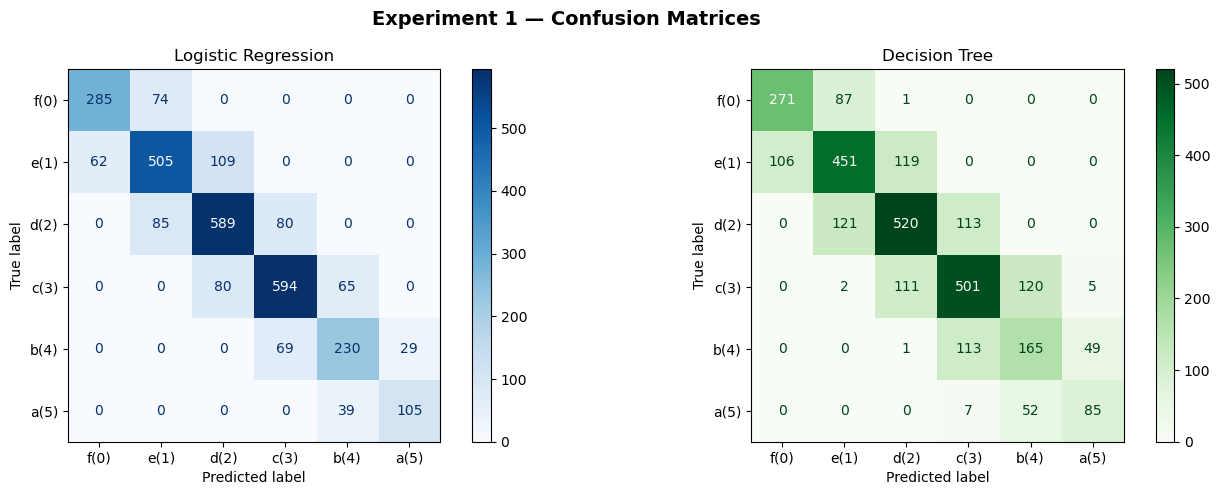

In [9]:
#Confusion Matrices
grade_labels = ['f(0)', 'e(1)', 'd(2)', 'c(3)', 'b(4)', 'a(5)']

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Logistic Regression confusion matrix
ConfusionMatrixDisplay.from_predictions(
    y_test, lr_predictions,
    display_labels=grade_labels,
    cmap='Blues',
    ax=axes[0]
)
axes[0].set_title('Logistic Regression')

# Decision Tree confusion matrix
ConfusionMatrixDisplay.from_predictions(
    y_test, dt_predictions,
    display_labels=grade_labels,
    cmap='Greens',
    ax=axes[1]
)
axes[1].set_title('Decision Tree')

plt.suptitle('Experiment 1 — Confusion Matrices', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## Step 5 — Compare Results

Let's put both models side-by-side to see which one performs better on academic + behavioral features.

In [10]:
# Calculate weighted F1 scores
lr_f1 = f1_score(y_test, lr_predictions, average='weighted')
dt_f1 = f1_score(y_test, dt_predictions, average='weighted')

# Build comparison table
comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree'],
    'Accuracy': [round(lr_accuracy, 4), round(dt_accuracy, 4)],
    'Weighted F1': [round(lr_f1, 4), round(dt_f1, 4)]
})

print('Experiment 1 — Results Comparison')
print('Feature Set: Academic + Behavioral')

print(comparison.to_string(index=False))

Experiment 1 — Results Comparison
Feature Set: Academic + Behavioral
              Model  Accuracy  Weighted F1
Logistic Regression    0.7693       0.7694
      Decision Tree    0.6643       0.6644


## Observations

- **Academic scores** (`math_score`, `science_score`, `english_score`) are strong predictors of `final_grade`.
- **Study method** being one-hot encoded gives both models clear categorical signals.
- **Logistic Regression** works as a good baseline but may struggle with non-linear grade boundaries.
- **Decision Tree** can capture more complex patterns but risks overfitting on training data.
- In the next experiments, we will add more features to see if performance improves.